# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    #city_name = city_info.city_name.capitalize()
    #country_code = city_info.country_code.upper()

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        response = requests.get(city_url)
        
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
    
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
    
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        else:
            print(f"City not found (Status code: {response.status_code}). Skipping...")

    except Exception as e:
        print(f"Error retrieving data for {city}: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1.5)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Udachny
Processing Record 2 of Set 1 | Sretensk
Processing Record 3 of Set 1 | Wailua homesteads
Processing Record 4 of Set 1 | Edinburgh of the seven seas
Processing Record 5 of Set 1 | Calvinia
Processing Record 6 of Set 1 | Invercargill
Processing Record 7 of Set 1 | Port-aux-francais
Processing Record 8 of Set 1 | Guayaramerin
Processing Record 9 of Set 1 | Stanley
Processing Record 10 of Set 1 | Vingt cinq
City not found (Status code: 404). Skipping...
Processing Record 11 of Set 1 | Al jawf
Processing Record 12 of Set 1 | Pitkyaranta
Processing Record 13 of Set 1 | Qaqortoq
Processing Record 14 of Set 1 | Blackmans bay
Processing Record 15 of Set 1 | Aykhal
Processing Record 16 of Set 1 | Cairo
Processing Record 17 of Set 1 | Hamilton
Processing Record 18 of Set 1 | Waitangi
Processing Record 19 of Set 1 | Flying fish cove
Processing Record 20 of Set 1 | Mascouche
Processing Record 21 of Se

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Udachny,66.4167,112.4000,-16.58,93,100,2.55,RU,1731195404
1,Sretensk,52.2453,117.7093,-13.89,89,16,1.68,RU,1731195406
2,Wailua homesteads,22.0669,-159.3780,27.44,79,75,7.20,US,1731195408
3,Edinburgh of the seven seas,-37.0676,-12.3116,15.39,91,100,3.75,SH,1731195431
4,Calvinia,-31.4707,19.7760,15.38,46,2,2.68,ZA,1731195470


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Udachny,66.4167,112.4000,-16.58,93,100,2.55,RU,1731195404
1,Sretensk,52.2453,117.7093,-13.89,89,16,1.68,RU,1731195406
2,Wailua homesteads,22.0669,-159.3780,27.44,79,75,7.20,US,1731195408
3,Edinburgh of the seven seas,-37.0676,-12.3116,15.39,91,100,3.75,SH,1731195431
4,Calvinia,-31.4707,19.7760,15.38,46,2,2.68,ZA,1731195470


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

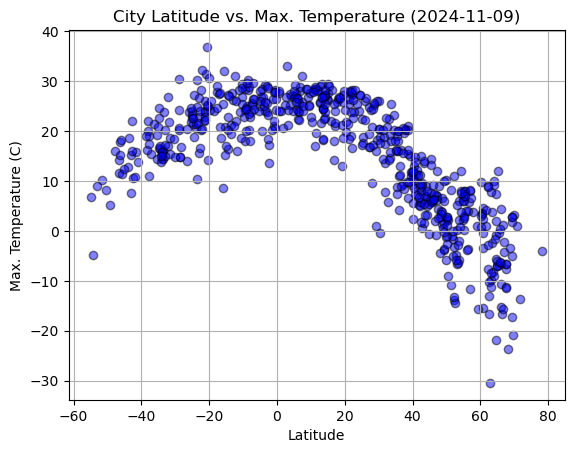

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", 
           facecolor= 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.title("City Latitude vs. Max. Temperature (2024-11-09)")
plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

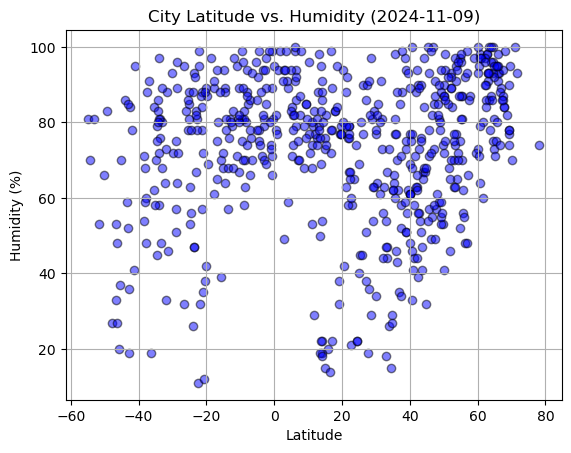

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", 
           facecolor= 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-11-09)")
plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

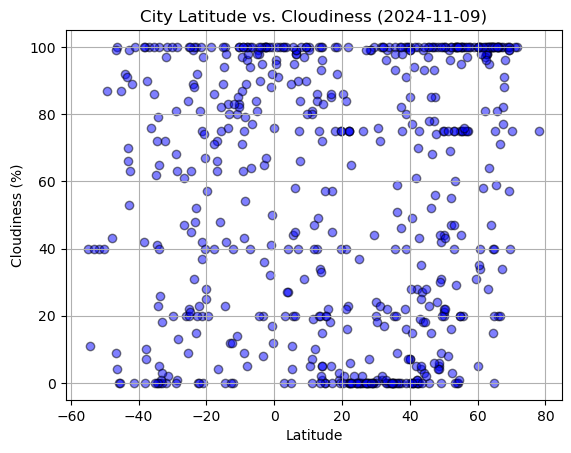

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", 
           facecolor= 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-11-09)")
plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

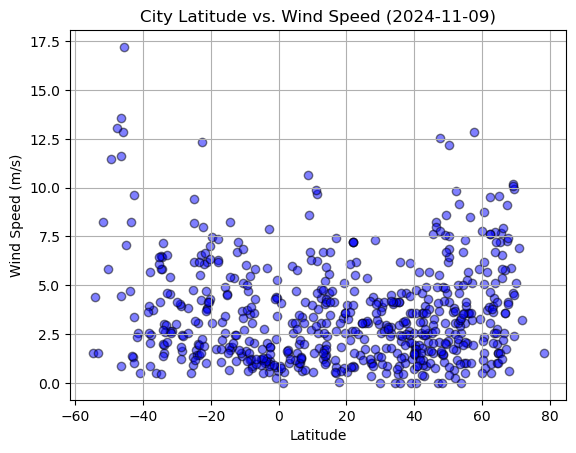

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", 
           facecolor= 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-11-09)")
plt.grid(axis="both")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots

def lrplot(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = slope * x + intercept
    line_eq = f'y = {str(round(slope, 2))}x + {str(round(intercept, 2))}'

    #Scatter plot and regression line 
    plt.scatter(x, y, marker="o", facecolor= 'blue', edgecolor='black', alpha=0.5)
    plt.plot(x, regress, color = "red")
    plt.annotate(line_eq, xy=(0, intercept), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5'))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis="both")
    print(f'The r-squared is: {rvalue**2}')
    plt.show()
    
    return line_eq




In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Udachny,66.4167,112.4000,-16.58,93,100,2.55,RU,1731195404
1,Sretensk,52.2453,117.7093,-13.89,89,16,1.68,RU,1731195406
2,Wailua homesteads,22.0669,-159.3780,27.44,79,75,7.20,US,1731195408
8,Stanley,54.8680,-1.6985,6.82,97,75,0.51,GB,1731195478
9,Al jawf,29.5000,38.7500,18.15,63,44,3.04,SA,1731195482


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Edinburgh of the seven seas,-37.0676,-12.3116,15.39,91,100,3.75,SH,1731195431
4,Calvinia,-31.4707,19.7760,15.38,46,2,2.68,ZA,1731195470
5,Invercargill,-46.4000,168.3500,17.79,48,100,0.89,NZ,1731195472
6,Port-aux-francais,-49.3500,70.2167,5.14,83,87,11.46,TF,1731195474
7,Guayaramerin,-10.8368,-65.3614,23.78,95,80,1.40,BO,1731195476


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7662486678780954


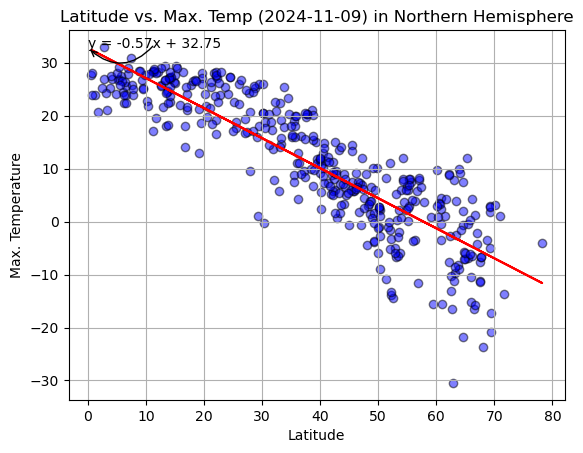

'y = -0.57x + 32.75'

In [65]:
# Linear regression on Northern Hemisphere
lrplot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max. Temperature", 
       "Latitude vs. Max. Temp (2024-11-09) in Northern Hemisphere")

The r-squared is: 0.41559423408419865


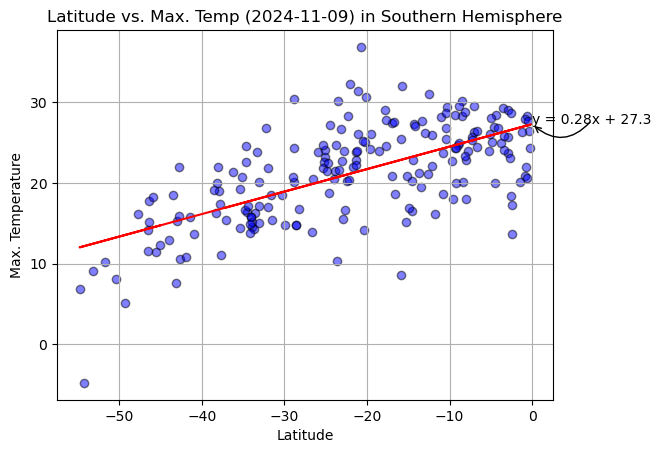

'y = 0.28x + 27.3'

In [67]:
# Linear regression on Southern Hemisphere
lrplot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max. Temperature", 
       "Latitude vs. Max. Temp (2024-11-09) in Southern Hemisphere")

**Discussion about the linear relationship:** 

The regression analysis of Latitude vs. Max. Temperature in the Northern Hemisphere demonstrates a negative relationship. This indicates that as latitude increases (moving further from the Equator), the maximum temperature tends to decrease. In other words, cities closer to the Equator (latitude = 0) experience higher temperatures compared to those situated further north. This regression has an r-squared of 0.76, which means the relationship is strong. 

On the other hand, the regression analysis of Latitude vs. Max. Temperature in the Southern Hemisphere shows a positive relationship. However, this apparent positive trend exists because latitude in the Southern Hemisphere is measured in negative degrees. As latitude values increase (moving closer to the Equator), the maximum temperature also tends to rise. This means that cities closer to the Equator (latitude = 0) experience higher temperatures compared to those located further south. This regression has an r-squared of 0.41, which means the relationship is important but it is not strong. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03956416435708449


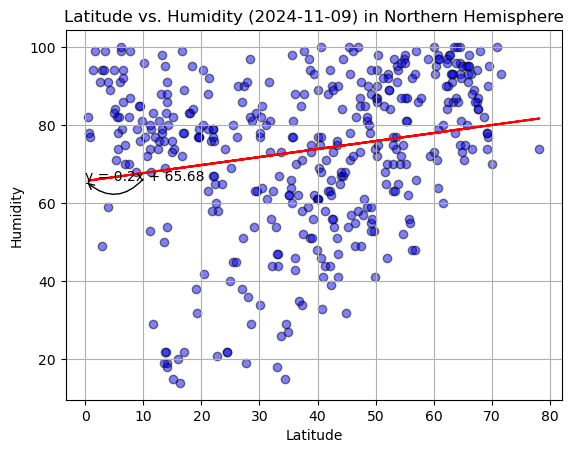

'y = 0.2x + 65.68'

In [68]:
# Northern Hemisphere
lrplot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 
       "Latitude vs. Humidity (2024-11-09) in Northern Hemisphere")

The r-squared is: 0.14557376157734606


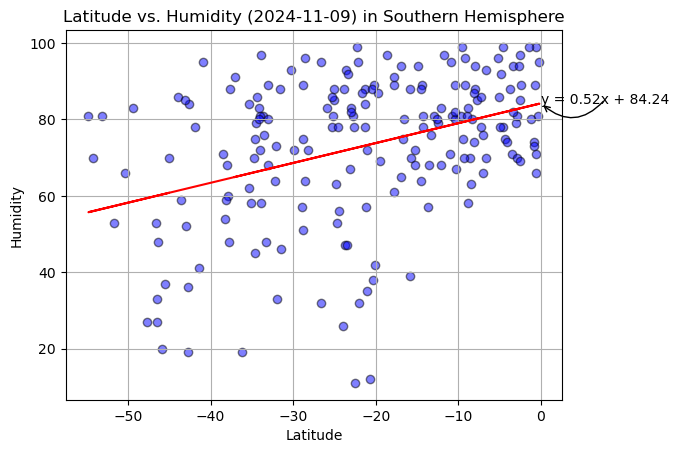

'y = 0.52x + 84.24'

In [69]:
# Southern Hemisphere
lrplot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", 
       "Latitude vs. Humidity (2024-11-09) in Southern Hemisphere")

**Discussion about the linear relationship:** 

In the first scatter plot, the relationship appears positive, meaning that humidity tends to be higher as latitude increases. However, the R-squared value is only 0.03, indicating that the relationship is almost nonexistent.

The second scatter plot shows the relationship between humidity and latitude in the Southern Hemisphere. This suggests that humidity increases as latitude moves closer to the Equator. In this case, the R-squared value is 0.14, indicating that a relationship exists, but it is not strong.

It is important to note that humidity may be related to the position of the sun. Therefore, it is crucial to identify the date, as this could indicate that the Northern Hemisphere is in autumn while the Southern Hemisphere is in spring.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.042434904117421214


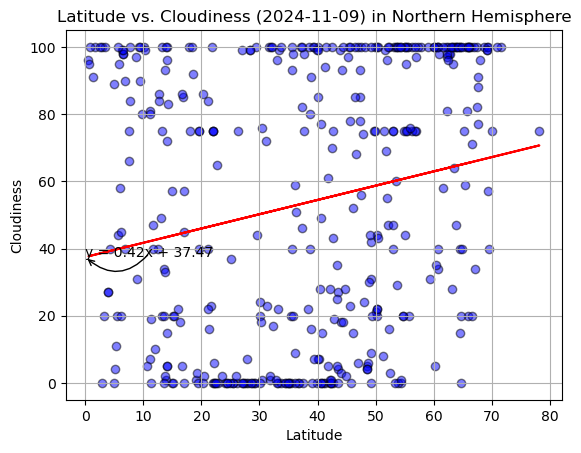

'y = 0.42x + 37.47'

In [70]:
# Northern Hemisphere
lrplot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 
       "Latitude vs. Cloudiness (2024-11-09) in Northern Hemisphere")

The r-squared is: 0.05411553428374325


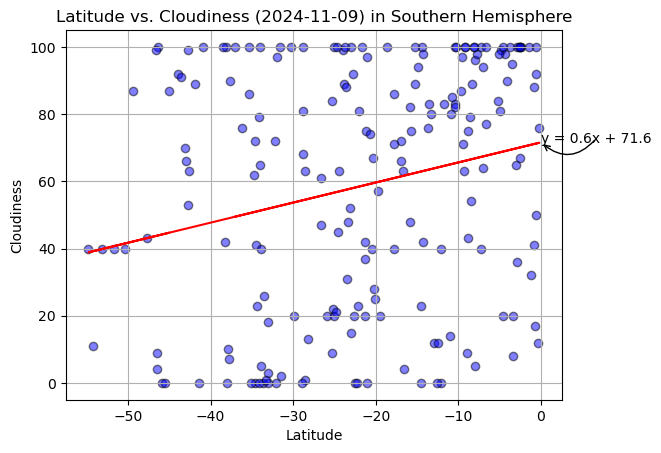

'y = 0.6x + 71.6'

In [71]:
# Southern Hemisphere
lrplot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 
       "Latitude vs. Cloudiness (2024-11-09) in Southern Hemisphere")

**Discussion about the linear relationship:** 

The linear regression analysis of Latitude vs. Cloudiness for the Northern Hemisphere data shows a positive relationship, indicating that cloudiness tends to increase as latitude rises. This means that cities located farther from the Equator tend to have more cloud cover. However, the R-squared value is only 0.04, suggesting that this relationship is weak.

In the Southern Hemisphere, the analysis also reveals a positive relationship, meaning that cities closer to the Equator experience more cloudiness. The R-squared value here is 0.05, further indicating a weak relationship. Both regressions suggest that cloud cover generally increases at higher latitudes, although the strength of this trend is minimal.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04122314648103883


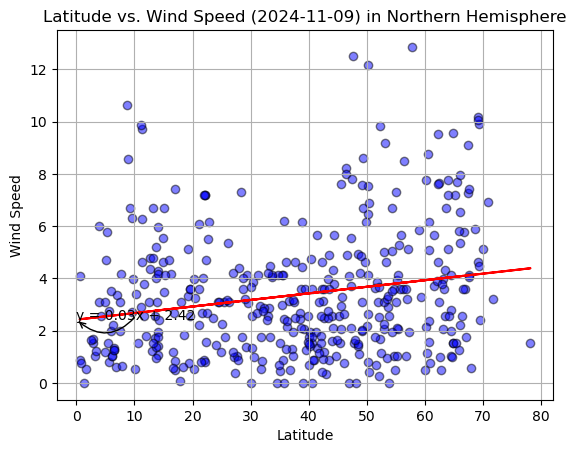

'y = 0.03x + 2.42'

In [72]:
# Northern Hemisphere
lrplot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 
       "Latitude vs. Wind Speed (2024-11-09) in Northern Hemisphere")

The r-squared is: 0.10970788603971518


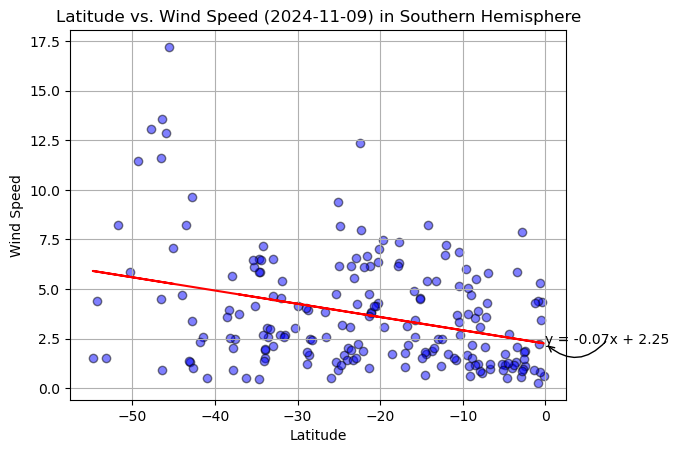

'y = -0.07x + 2.25'

In [73]:
# Southern Hemisphere
lrplot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 
       "Latitude vs. Wind Speed (2024-11-09) in Southern Hemisphere")

**Discussion about the linear relationship:** 

The Latitude vs. Wind Speed regression for the Northern Hemisphere suggests a positive relationship between the two variables, indicating that wind speed tends to be higher in cities located farther from the Equator. However, the R-squared value is only 0.04, implying that this relationship is weak.

In the Southern Hemisphere, the Latitude vs. Wind Speed regression shows a negative relationship, suggesting that wind speed decreases as cities are closer to the Equator. In this case, the R-squared value is 0.10, which indicates that the relationship exists but is not strong.

Overall, the results of both regression analyses imply that wind speed generally tends to be lower near the Equator.